## Tensorflow practice

Examples from Tensorflow For Beginners

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os

%matplotlib inline

print(tf.__version__)

1.9.0


## Tensors

* N-Dimensional arrays
* Measured by rank
* All elements are of the same datatype

In [30]:
# Rank 0
print(np.array(1).ndim)

# Rank 1
print(np.array([1,2,3]).ndim)

# Rank 2
print(np.array([[1,2,3], [4,5,6]]).ndim)

# Rank 3
print(np.array([[[1,2,3], [4,5,6]]]).ndim)

0
1
2
3


## Tensorflow Building Blocks

### Lower level
* Tensors

* Operations

* Graphs / sessions

## Higher level
* Loss functions

* Optimizers

* Layers

* Estimators

## Loss functions

Differentiable functions that measure error between true and predicted values

Examples of loss functions:
* MSE

* Log loss

* Cross entropy ( binary, categorical )

* Cosine distance

## Optimizers

Built-in optimizers inherit from Optimizer class

Examples of optimizers:
* Gradient Descent

* Adam

* RMSProp

* Adagrad

* Momentum

* Adadelta

Optimizers are algorithms that minimize the loss of a model through the loss function

Take from a starting point on loss surface in high dimensional space and traverse the search space to reach global minimum

## Layers

Layers are collection of nodes that are composed of tensors and operations

Normally connected in series but some models have them connected in parallel

Tensorflow offers pre-built functions for creating layers in a model

Examples of layers:
* Input

* Convolutional(1d, 2d, 3d)

* Pooling

* Dropout

* Dense


## Estimators

Handles training, evaluation, prediction, building graph



In [31]:
# y = mx + b
m = tf.constant(3.0, name="m")
b = tf.constant(1.5, name="b")

x = tf.placeholder(tf.float32, name="x")

y = m*x + b

with tf.Session() as sess:
    print(sess.run(y, feed_dict={x: 2}))
    

7.5


In [32]:
M = tf.constant([[1,2], [3,4]], dtype=tf.float32)
V = tf.constant([5,6], dtype=tf.float32)
M+V
print(M.shape)
print(V.shape)

with tf.Session() as sess:
    print(sess.run(M+V))
    print(sess.run(M*V)) # unit wise multiplication
    print(sess.run(tf.matmul(M, tf.reshape(V, (2,1))))) # matrix multiplication

(2, 2)
(2,)
[[ 6.  8.]
 [ 8. 10.]]
[[ 5. 12.]
 [15. 24.]]
[[17.]
 [39.]]


## Machine Learning Lifecycle

* Define Objective

* Collect data

* Data Cleaning (handle missing values, extreme values ...)

* EDA (Exploratory Data Analysis) ( understand structure and relationships within data; perform statistical analysis; data plots )

* Data Processing ( structure data for models )

* Train / eval models

* Deploy

* Monitor Results

# ML lifecycle example

## 1. Define Objective

Objective: Infers how IQ, Years experience, and Age affects income using a Linear model

## 2. Collect data

In [33]:
# create dataset
np.random.seed(555)
# IQ
X1 = np.random.normal(100, 15, 200).astype(int)
# Years of experience
X2 = np.random.normal(10, 4.5, 200).astype(int)
# Age
X3 = np.random.normal(32, 4, 200).astype(int)

dob = np.datetime64('2017-10-31') - 365*X3
b = 5
er = np.random.normal(0, 1.5, 200)

Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + b + e for x1,x2,x3,e, in zip(X1, X2, X3, er)])

## 3. Data Cleaning

In [34]:
cols = ["iq", "years_experience", "dob"]
df =  DF(list(zip(X1, X2, dob)), columns=cols)
df['income'] = Y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_experience    200 non-null int64
dob                 200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.3 KB


In [35]:
df.describe()

,iq,years_experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.220000,74.445354
std,14.991253,4.575618,8.758692
min,62.000000,-5.000000,50.177009
25%,88.500000,6.000000,68.355058
50%,99.000000,10.000000,74.264406
75%,108.250000,12.000000,79.821947
max,134.000000,21.000000,98.020876


In [36]:
df = df[df.years_experience >=0]
df.describe()

,iq,years_experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.454082,74.839390
std,14.769628,4.307767,8.365558
min,62.000000,0.000000,54.240093
25%,88.500000,6.000000,68.732449
50%,99.000000,10.000000,74.589067
75%,108.250000,12.250000,80.052339
max,134.000000,21.000000,98.020876


## 4. EDA

In [37]:
df.describe(include=["datetime64"])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233588d0>,
      dtype=object)

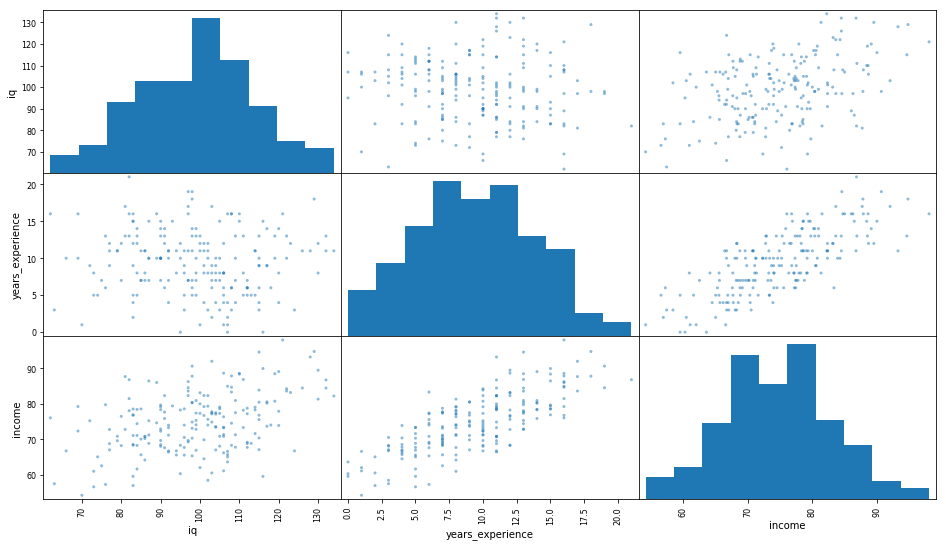

In [38]:
pd.plotting.scatter_matrix(df, figsize=(16,9))

In [39]:
df.corr()

,iq,years_experience,income
iq,1.000000,-0.075795,0.418676
years_experience,-0.075795,1.000000,0.758966
income,0.418676,0.758966,1.000000


## 5. Data processing / Feature engineering

In [40]:
df['age'] = df.dob.apply(lambda x: (dt.strptime('2017-10-31', '%Y-%m-%d')-x).days/365)
df.drop('dob', axis=1, inplace=True) # going down rows axis=0
df.head()

,iq,years_experience,income,age
0,102,3,58.463855,23.0
1,105,15,78.621766,25.0
2,83,2,56.977682,29.0
3,103,9,74.873786,33.0
4,97,11,82.345164,36.0


## 6. Create Model

In [41]:
# train/test split
X = df.iloc[:, [0,1,3]]
Y = df.income

tr_index = X.sample(frac=0.67).index
Xtr = X[X.index.isin(tr_index)].values
Xts = X[~X.index.isin(tr_index)].values

Ytr = Y[Y.index.isin(tr_index)].values
Yts = Y[~Y.index.isin(tr_index)].values

print(Xtr.shape)
print(Ytr.shape)

(131, 3)
(131,)


In [42]:
tf.reset_default_graph()

sess = tf.Session()

In [43]:
# create parameters
w = tf.get_variable(name="w", initializer=[[0.1], [0.1], [0.1]])
# create w summaries for tensorboard
tf.summary.scalar("wmean", tf.reduce_mean(w))
tf.summary.scalar("wsum", tf.reduce_sum(w))
tf.summary.histogram("weights", w)

# create b summaries for tensorboard
b = tf.get_variable(name="b", initializer=0.)
tf.summary.scalar("intercept", b)

# placeholders
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y_true")

# model
yhat = tf.reshape(tf.matmul(x, w) + b, [-1,], name="yhat")

### create loss and test score functions

In [44]:
mse = tf.reduce_mean(tf.square(y - yhat), name="mse")
rmse = tf.sqrt(mse, name="rmse")
tf.summary.scalar("loss_rmse", rmse)

test_nrmse = tf.divide(rmse, tf.abs(tf.reduce_mean(y)), name="nrmse")
tf.summary.scalar("test_nrmse", test_nrmse)

# merge all summaries and create writer object that will write during training
summaries = tf.summary.merge_all()
writer = tf.summary.FileWriter(logdir="logs/linear_logs", graph=sess.graph)

In [45]:
init = tf.variables_initializer([w, b])
sess.run(init)

In [46]:
# reset parameters w and b
sess.run(init)

opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(rmse)

for i in range(800):
    if (i%50 == 0) & (i>0):
        smry, nrmse = sess.run([summaries, test_nrmse], {x: Xts, y: Yts})
        writer.add_summary(smry, i)
        print("Test NRMSE: {}".format(nrmse))
    else:
        smry, _ = sess.run([summaries, train], {x: Xtr, y: Ytr})
        writer.add_summary(smry, i)

Test NRMSE: 0.10370519012212753
Test NRMSE: 0.08225972205400467
Test NRMSE: 0.06930278986692429
Test NRMSE: 0.07505649328231812
Test NRMSE: 0.07958540320396423
Test NRMSE: 0.0750477984547615
Test NRMSE: 0.0772860124707222
Test NRMSE: 0.07560711354017258
Test NRMSE: 0.07566636800765991
Test NRMSE: 0.0761478990316391
Test NRMSE: 0.07451006770133972
Test NRMSE: 0.07657862454652786
Test NRMSE: 0.0736749991774559
Test NRMSE: 0.0769052505493164
Test NRMSE: 0.0730675458908081


In [47]:
# get learned parameters w and b

sess.run([w,b])

[array([[0.27084246],
        [1.4098423 ],
        [0.92687744]], dtype=float32), 0.026805855]

## Tensorboard

* Saving model summaries for Tensorboard

* Viewing model summaries for Tensorboard

* Exploring Graphs in Tensorboard

* Pipeline Basics: Automating preprocessing


For examples in summaries, check the earlier code blocks above which contain ``tf.summary`` calls and also the training phase


To run tensorboard:
```python
tensorboard --logdir=tensorflow/logs/linear_logs # replace logdir with target directory
```

Navigate to localhost:6060 to browse the UI

## Preprocessing with TF

* Reading in datasets

* Iterators (iterate over datasets using TF)
  * one-shot
  * initializable
  * reinitializable
  * feedable
  
* Preprocessing functions
  * load and apply transforms

* Batching data
  
  

## Reading in datasets

### From a numpy array

In [49]:
# dumping the above numpy data onto local disk

Xtr.dump("Xtr.npy")
Ytr.dump("ytr.npy")

Xts.dump("Xts.npy")
Yts.dump("yts.npy")

In [50]:
Xtr = np.load("Xtr.npy")
ytr = np.load("ytr.npy")

# create TF dataset
training = tf.data.Dataset.from_tensor_slices((Xtr, ytr))

training2 = tf.data.Dataset.from_tensor_slices({"x_tr": Xtr, "y_tr": ytr})

print(training2.output_types)
print(training2.output_shapes)

{'x_tr': tf.float64, 'y_tr': tf.float64}
{'x_tr': TensorShape([Dimension(3)]), 'y_tr': TensorShape([])}


## Iterators

In [51]:
len(Xtr)

131

In [54]:
iterator = training2.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(131):
    value = sess.run(next_element)
    print(value)

{'x_tr': array([102.,   3.,  23.]), 'y_tr': 58.46385501134321}
{'x_tr': array([105.,  15.,  25.]), 'y_tr': 78.62176644725577}
{'x_tr': array([103.,   9.,  33.]), 'y_tr': 74.87378602999186}
{'x_tr': array([97., 11., 36.]), 'y_tr': 82.3451639232842}
{'x_tr': array([106.,   8.,  31.]), 'y_tr': 71.36394232198656}
{'x_tr': array([87.,  7., 35.]), 'y_tr': 68.86607199096053}
{'x_tr': array([132.,  13.,  24.]), 'y_tr': 84.46497547360381}
{'x_tr': array([105.,   3.,  31.]), 'y_tr': 68.07863144488398}
{'x_tr': array([130.,   8.,  30.]), 'y_tr': 81.34280301359145}
{'x_tr': array([99., 10., 29.]), 'y_tr': 72.82972856214282}
{'x_tr': array([99.,  8., 34.]), 'y_tr': 74.10359578913412}
{'x_tr': array([114.,   5.,  30.]), 'y_tr': 71.63211227078334}
{'x_tr': array([126.,  11.,  28.]), 'y_tr': 84.47719447634135}
{'x_tr': array([79., 11., 35.]), 'y_tr': 70.8625728000356}
{'x_tr': array([77., 12., 32.]), 'y_tr': 72.78103167247302}
{'x_tr': array([100.,  12.,  35.]), 'y_tr': 83.12354807850141}
{'x_tr': arr

In [55]:
iterator = training2.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(131):
    try:
        value = sess.run(next_element)
        print(value["y_tr"])
    except tf.errors.OutOfRangeError as e:
        print("No more data!")

58.46385501134321
78.62176644725577
74.87378602999186
82.3451639232842
71.36394232198656
68.86607199096053
84.46497547360381
68.07863144488398
81.34280301359145
72.82972856214282
74.10359578913412
71.63211227078334
84.47719447634135
70.8625728000356
72.78103167247302
83.12354807850141
82.21480578182427
63.6304229670532
78.56469187979704
83.6177156191309
69.26999662560108
70.33713871534796
66.92866650802343
78.59269088257484
83.2076776500986
75.33958234375136
78.5513893853179
66.61433109291313
65.59378462617198
62.55643507608056
80.93948481374724
70.83010764671275
77.91321736962354
79.4223530055709
72.80731035701088
68.55178741653346
88.659757010847
78.37595001643201
79.67907915925967
89.96633035638258
67.64214152278129
61.6449691272091
68.51609895198001
80.35964527715005
82.32738955049696
88.60251739778863
66.74084087252673
92.0045042806686
88.39360327554763
65.71252770054033
68.86853147196973
59.571324065961605
75.63072188441781
77.21131293833085
65.05847331770318
77.51282357257574
86

## Preprocessing

__Steps:__

1. Define your transformations

2. Use `Data.map(f)` where `f` is a transformation

In [56]:
# save data to csv without index
df.to_csv('data.csv', index=False)

In [64]:
# define transformation
def input_fn(csv_file, feature_names=['x1', 'x2', 'x3'], noise=True):
    def decode_csv_add_noise(line, noise=noise):
        parsed_line = tf.decode_csv(line, [[0.], [0.], [0.], [0.]])
        label = parsed_line[-1:]
        del parsed_line[-1] # delete last element
        features = parsed_line
        
        # add noise to data
        if noise:
            features = tf.add(features, tf.random_normal(shape=[len(features)], mean=0., stddev=0.1))
        
        return features, label
    
    dataset = tf.data.TextLineDataset(csv_file).skip(1).map(decode_csv_add_noise)
    
    iterator = dataset.make_one_shot_iterator()
    features, label = iterator.get_next()
    return features, label

In [71]:
next_ = input_fn("data.csv", noise=False)

with tf.Session() as sess:
    X, y = sess.run(next_)
    print(X, y)

[102.         3.        58.463856] [23.]


## Batching data

In [73]:
# define transformation
def input_fn(csv_file, feature_names=['x1', 'x2', 'x3'], batch_size=16, noise=True):
    def decode_csv_add_noise(line, noise=noise):
        parsed_line = tf.decode_csv(line, [[0.], [0.], [0.], [0.]])
        label = parsed_line[-1:]
        del parsed_line[-1] # delete last element
        features = parsed_line
        
        # add noise to data
        if noise:
            features = tf.add(features, tf.random_normal(shape=[len(features)], mean=0., stddev=0.1))
        
        return features, label
    
    dataset = tf.data.TextLineDataset(csv_file).skip(1).map(decode_csv_add_noise)
    
    dataset = dataset.batch(batch_size)
    iterator = dataset.make_one_shot_iterator()
    batch_features, batch_labels = iterator.get_next()
    return batch_features, batch_labels

In [76]:
next_ = input_fn("data.csv", noise=False, batch_size=3)

with tf.Session() as sess:
    batch = sess.run(next_)
    print(batch[0])
    print()
    print(batch[1])

[[102.         3.        58.463856]
 [105.        15.        78.621765]
 [ 83.         2.        56.97768 ]]

[[23.]
 [25.]
 [29.]]
